In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import import_ipynb
import copy
import data_preperation as dp
import internal_inconsistencies as ii
import external_inconsistencies as ei


importing Jupyter notebook from data_preperation.ipynb
importing Jupyter notebook from internal_inconsistencies.ipynb
importing Jupyter notebook from external_inconsistencies.ipynb


In [2]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR', 'United Kingdom': 'GB',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK'}
abbr_list=list(countries.values())

# 1. Data mismatches in ENTSO-E data

## 1.1 Calculating missing values in data files

,Country,demand,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,...,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,Total missing generation data
0,AT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BE,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,836,0,8027
2,BG,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8760
3,CH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8760
4,CZ,7,2,2,2,2,2,5,0,0,...,3,0,2,2,2,4,5,0,2,44
5,DE,0,0,0,34848,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34848
6,DK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,EE,144,206,0,206,206,0,0,206,206,...,0,0,0,206,206,206,206,0,206,2266
8,ES,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,8780
9,FI,3,2,0,0,3,3,3,0,2,...,0,0,2,2,3,0,3,0,2,28


,Link,No of missing data
0,AT - > CH,0
1,CH - > AT,0
2,AT - > CZ,0
3,CZ - > AT,0
4,AT - > DE,0
...,...,...
147,MK - > RS,0
148,RS - > RO,0
149,RO - > RS,0
150,SK - > UA,9


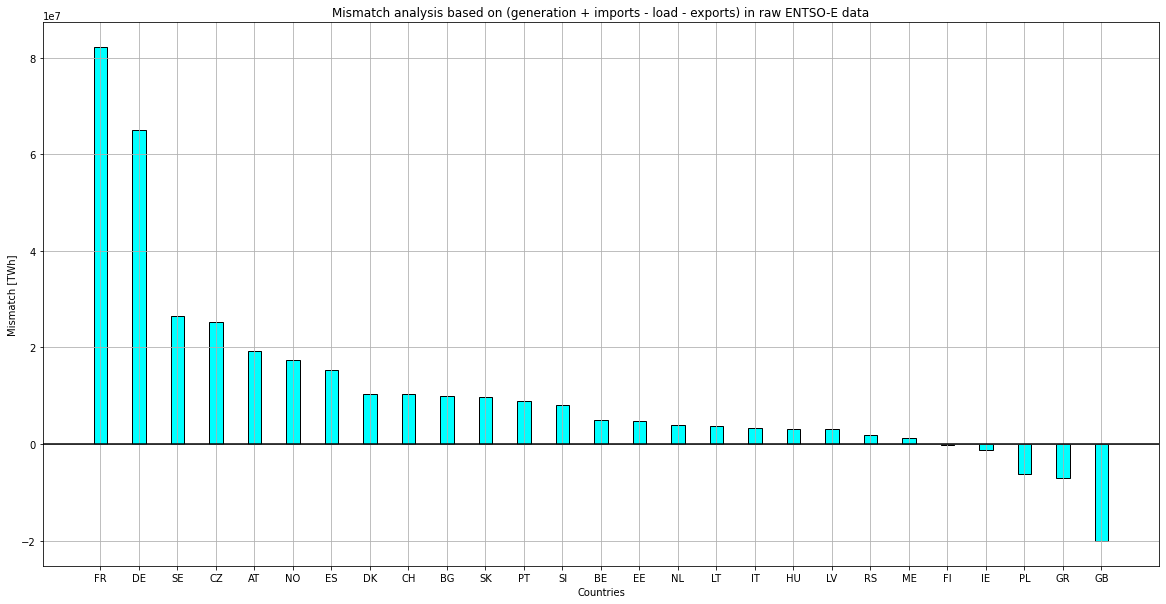

In [6]:
generation_load_missing_data, transmission_missing_data, mismatch_data = ii.mismatch_raw_data(countries)

## 1.2 Identifying inconsistencies in ENTSO-E Generation data

In [4]:
inconsistency_in_generation = ii.inconcistencies_generation_data()


Austria Hydro Water Reservoir 2018345.0 4650928.5
Austria Hydro Run-of-river and poundage 11300264.0 25363701.25
Austria Fossil Gas 7458582.0 8166846.0
Austria Hydro Pumped Storage 3009729.0 4696467.0
Austria Fossil Hard coal 1439190.0 1422419.5
Belgium Biomass 1493407.0 2619943.0
Belgium Hydro Pumped Storage 1014065.0 999764.0
Belgium Wind Offshore 3295644.0 3321049.0
Belgium Nuclear 27255049.0 27251673.0
Belgium Fossil Gas 17182561.0 22303256.0
Czech Republic Fossil Gas 1729169.0 3357028.0
Czech Republic Hydro Pumped Storage 987174.0 1041674.0
Czech Republic Nuclear 28187334.0 28228525.0
Czech Republic Fossil Brown coal/Lignite 21882971.0 33727959.0
Czech Republic Fossil Hard coal 1243995.0 3487625.0
Estonia Fossil Oil shale 9591722 8219587.0
Finland Biomass 1627780 6405436.0
Finland Fossil Oil 4814 17314.0
Finland Fossil Gas 2081816 4999951.0
Finland Nuclear 21888634 21884428.0
Finland Fossil Peat 2618173 4275378.0
Finland Other 755746 1403978.0
Finland Fossil Hard coal 5093275 5971

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# 2. ENTSO-E data representation

## 2.1 Fill the missing observations and get all the hourly load data of each country to a single dataframe

In [3]:
load_dic=dp.load(countries)
# display(load_data)

'Austria: 0 missing data filled'

'Belgium: 0 missing data filled'

'Bulgaria: 25 missing data filled'

'Switzerland: 0 missing data filled'

'Czech Republic: 7 missing data filled'

'Germany: 0 missing data filled'

'Denmark: 0 missing data filled'

'Estonia: 144 missing data filled'

'Spain: 2 missing data filled'

'Finland: 3 missing data filled'

'France: 18 missing data filled'

'United Kingdom: 8 missing data filled'

'Greece: 2 missing data filled'

'Hungary: 0 missing data filled'

'Ireland: 18 missing data filled'

'Italy: 0 missing data filled'

'Lithuania: 67 missing data filled'

'Latvia: 6 missing data filled'

'Montenegro: 0 missing data filled'

'Netherlands: 0 missing data filled'

'Norway: 0 missing data filled'

'Poland: 1 missing data filled'

'Portugal: 0 missing data filled'

'Serbia: 1 missing data filled'

'Sweden: 0 missing data filled'

'Slovenia: 0 missing data filled'

'Slovakia: 0 missing data filled'

## 2.2 Fill the missing observations and get all the hourly generation data of each country from each source to a single dataframe

In [5]:
generation_dic=dp.generation(countries)
# display(generation_data)

'Austria: 0 missing data filled'

'Belgium: 4993 missing data filled'

'Bulgaria: 0 missing data filled'

'Switzerland: 0 missing data filled'

'Czech Republic: 41 missing data filled'

'Germany: 34848 missing data filled'

'Denmark: 0 missing data filled'

'Estonia: 2266 missing data filled'

'Spain: 8779 missing data filled'

'Finland: 28 missing data filled'

'France: 4724 missing data filled'

'United Kingdom: 509 missing data filled'

'Greece: 8773 missing data filled'

'Hungary: 12123 missing data filled'

'Ireland: 374 missing data filled'

'Italy: 286 missing data filled'

'Lithuania: 264 missing data filled'

'Latvia: 50 missing data filled'

'Montenegro: 7246 missing data filled'

'Netherlands: 8635 missing data filled'

'Norway: 9 missing data filled'

'Poland: 0 missing data filled'

'Portugal: 0 missing data filled'

'Serbia: 183 missing data filled'

'Sweden: 1 missing data filled'

'Slovenia: 10 missing data filled'

'Slovakia: 5259 missing data filled'

## 2.3 Fill the missing observations and get all the hourly cross-border transmission data of each country to a single dataframe

In [4]:
transmission_data = dp.cross_border()
# display(transmission_data)
# 'cross_border_data' shows the net import/net export of the whole country in hourly timesteps
# display(crossborder_data)


'AT - > CH: 0 missing data filled'

'AT - > CZ: 0 missing data filled'

'AT - > DE: 0 missing data filled'

'AT - > HU: 0 missing data filled'

'AT - > IT: 0 missing data filled'

'AT - > SI: 0 missing data filled'

'BE - > FR: 0 missing data filled'

'BE - > LU: 0 missing data filled'

'BE - > NL: 0 missing data filled'

'BG - > GR: 0 missing data filled'

'BG - > MK: 864 missing data filled'

'BG - > RO: 4 missing data filled'

'BG - > RS: 0 missing data filled'

'BG - > TR: 864 missing data filled'

'CH - > DE: 0 missing data filled'

'CH - > FR: 0 missing data filled'

'CH - > IT: 0 missing data filled'

'CZ - > DE: 0 missing data filled'

'CZ - > PL: 0 missing data filled'

'CZ - > SK: 0 missing data filled'

'DE - > DK: 0 missing data filled'

'DE - > FR: 2 missing data filled'

'DE - > LU: 0 missing data filled'

'DE - > NL: 34 missing data filled'

'DE - > PL: 0 missing data filled'

'DE - > SE: 0 missing data filled'

'DK - > NO: 0 missing data filled'

'DK - > SE: 0 missing data filled'

'EE - > FI: 421 missing data filled'

'EE - > LV: 3602 missing data filled'

'EE - > RU: 414 missing data filled'

'ES - > FR: 0 missing data filled'

'ES - > PT: 0 missing data filled'

'FI - > NO: 0 missing data filled'

'FI - > RU: 8 missing data filled'

'FI - > SE: 0 missing data filled'

'FR - > GB: 60 missing data filled'

'FR - > IT: 0 missing data filled'

'FR - > UK: 60 missing data filled'

'GR - > AL: 0 missing data filled'

'GR - > IT: 0 missing data filled'

'GR - > MK: 0 missing data filled'

'HR - > BA: 0 missing data filled'

'HR - > HU: 0 missing data filled'

'HR - > RS: 0 missing data filled'

'HR - > SI: 0 missing data filled'

'HU - > RO: 0 missing data filled'

'HU - > RS: 0 missing data filled'

'HU - > SK: 0 missing data filled'

'HU - > UA: 14 missing data filled'

'IE - > GB: 0 missing data filled'

'IE - > UK: 0 missing data filled'

'IT - > MT: 18 missing data filled'

'IT - > SI: 46 missing data filled'

'LT - > BY: 58 missing data filled'

'LT - > LV: 76 missing data filled'

'LT - > PL: 0 missing data filled'

'LT - > RU: 58 missing data filled'

'LT - > SE: 0 missing data filled'

'LV - > RU: 18 missing data filled'

'ME - > AL: 0 missing data filled'

'ME - > BA: 0 missing data filled'

'ME - > RS: 0 missing data filled'

'NL - > GB: 0 missing data filled'

'NL - > NO: 0 missing data filled'

'NL - > UK: 0 missing data filled'

'NO - > SE: 0 missing data filled'

'PL - > SE: 0 missing data filled'

'PL - > SK: 0 missing data filled'

'PL - > UA: 0 missing data filled'

'RS - > AL: 0 missing data filled'

'RS - > BA: 0 missing data filled'

'RS - > HR: 0 missing data filled'

'RS - > MK: 0 missing data filled'

'RS - > RO: 0 missing data filled'

'SK - > UA: 17 missing data filled'

## 2.4 Validating the missing observations filling model

Austria Biomass  - Actual Aggregated [MW]
Austria Fossil Gas  - Actual Aggregated [MW]
Austria Fossil Hard coal  - Actual Aggregated [MW]
Austria Hydro Pumped Storage  - Actual Aggregated [MW]
Austria Hydro Run-of-river and poundage  - Actual Aggregated [MW]
Austria Hydro Water Reservoir  - Actual Aggregated [MW]
Austria Other  - Actual Aggregated [MW]
Austria Solar  - Actual Aggregated [MW]
Austria Waste  - Actual Aggregated [MW]
Austria Wind Onshore  - Actual Aggregated [MW]
Denmark Biomass  - Actual Aggregated [MW]
Denmark Fossil Gas  - Actual Aggregated [MW]
Denmark Fossil Hard coal  - Actual Aggregated [MW]
Denmark Fossil Oil  - Actual Aggregated [MW]
Denmark Solar  - Actual Aggregated [MW]
Denmark Waste  - Actual Aggregated [MW]
Denmark Wind Offshore  - Actual Aggregated [MW]
Denmark Wind Onshore  - Actual Aggregated [MW]
Norway Fossil Gas  - Actual Aggregated [MW]
Norway Hydro Run-of-river and poundage  - Actual Aggregated [MW]
Norway Hydro Water Reservoir  - Actual Aggregated [

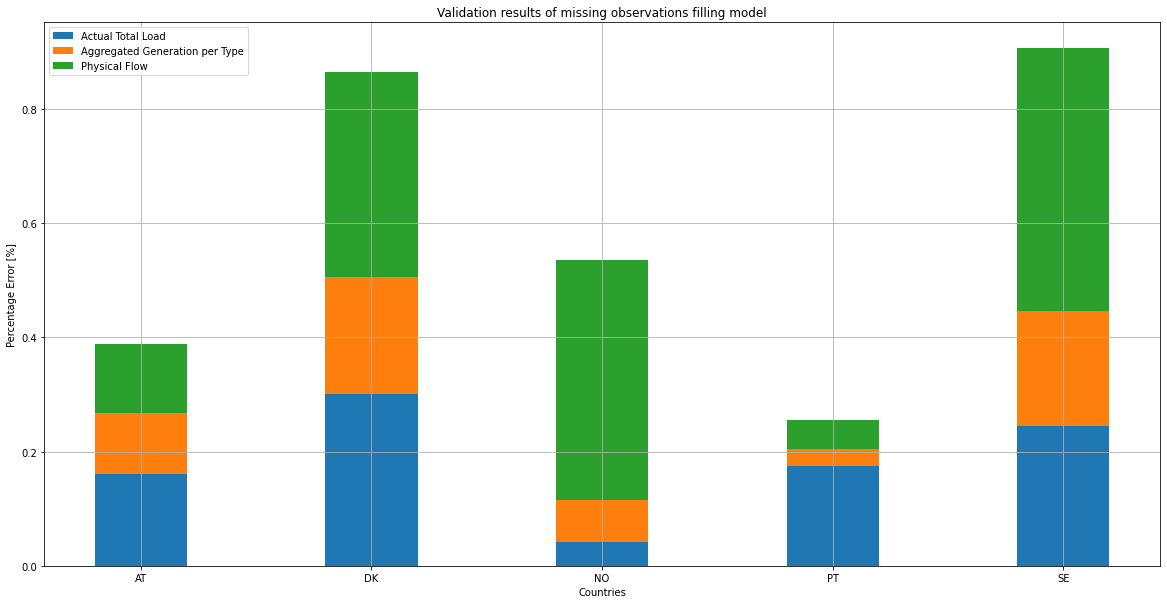

In [4]:
selected_countries = {'Austria':"AT", 'Denmark':"DK", 'Norway':"NO", 'Portugal':"PT",'Sweden':'SE'}
dp.validation(selected_countries)

# 3. Consolidation based on internal data

## 3.1 Obtaining consolidated ENTSO-E data using Nearest Neighbours Mean Approach

### !!! This step takes about 14 minutes to complete in an Intel I5 processor with 8 GB Ram

In [ ]:
# ii.consolidation(countries, 'Nearest Neighbours Mean')


## 3.2 Obtaining consolidated data using Polynomial Linear Regression

### !!! This step takes about 40 minutes to complete in an Intel I5 processor with 8 GB Ram

In [ ]:
# ii.consolidation(countries, 'Polynomial Linear Regression')


## 3.3 Obtaining consolidated ENTSO-E data using Internal Sigma Approach

### !!! This step takes about 2 hours to complete in an Intel I5 processor with 8 GB Ram
### Licensed Gurobi Optimizer is required

In [3]:
load_dic = {}
generation_dic = {}
transmission_data = pd.DataFrame()

for abbr in abbr_list:
    load_dic[abbr] = pd.read_csv(f'../Data Sources/output/Polynomial Linear Regression/Load/{abbr}.csv').iloc[:,1:]
    generation_dic[abbr] = pd.read_csv(f'../Data Sources/output/Polynomial Linear Regression/Generation/{abbr}.csv').iloc[:,1:]
transmission_data = pd.read_csv(f'../Data Sources/output//Polynomial Linear Regression/Transmission/all_transmissions.csv').iloc[:, 1:]

In [4]:
load_dic_copy = copy.deepcopy(load_dic) 
generation_dic_copy = copy.deepcopy(generation_dic)
transmission_data_copy = copy.deepcopy(transmission_data)
consolidated_gen_data, consolidated_load_data, consolidated_transmission_data = ii.sigma(load_dic_copy, generation_dic_copy, transmission_data_copy, countries)


SIGMA CALCULATED
VARIABLES DECLARED
Academic license - for non-commercial use only - expires 2021-09-28
Using license file C:\Users\lovin\gurobi.lic
OPTIMIZATION COMPLETED


<string>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 3.2 Mismatch analysis in the consolidated ENTSO-E data

### 3.2.1 Mismatch analysis in all 27 countries

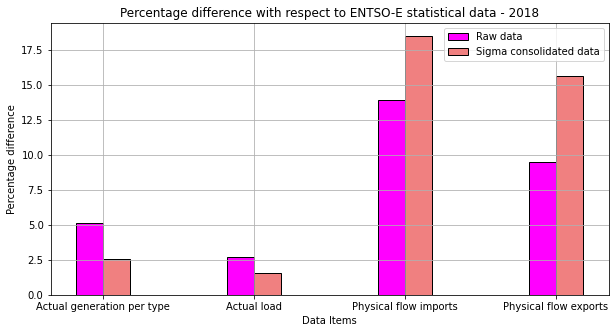

In [7]:
ii.mismatch_analysis(mismatch_data, abbr_list)


### 3.2.2 Mismatch analysis with only selected countries in optimization based internal consolidation method

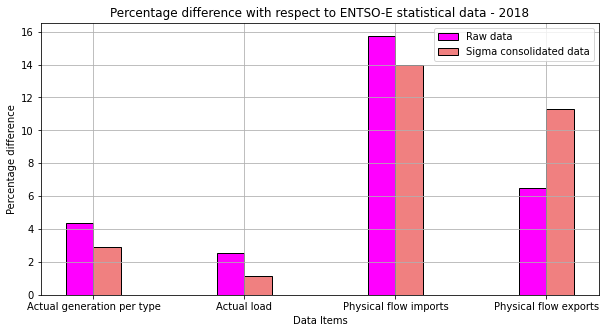

In [8]:
selected_countries = ['AT', 'CZ', 'DK', 'ES', 'FR','IE', 'NL', 'NO', 'PT', 'SI', 'SE', 'CH', 'GB']
ii.mismatch_analysis(mismatch_data, selected_countries)


# 4. Comparission of ENTSO-E data with other sources

## 4.1 Comparing ENTSO-E & Eurostat data

### 4.1.1 Comparing annual generation data of ENTSO-E & Eurostat data

In [ ]:
# ei.eurostat_comparission_gen_data(generation_data,countries)

### 4.1.2 Comparing annual load data of ENTSO-E & Eurostat data

In [ ]:
# ei.eurostat_comparission_load_data(load_data, countries)


### 4.1.3 Comparing annual import/export data of ENTSO-E & Eurostat data

In [ ]:
# ei.eurostat_comparission_transmission_data(import_export_using_crossborder_data, countries)